# Mall Customer Segmentation


***Problem Statement***: Group customers of a E-Commerce store based on their purchase history

***Dataset***: The dataset used is [E-Commerce Data]('https://www.kaggle.com/datasets/carrie1/ecommerce-data') from Kaggle. It has following dataset attributes:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

***Methodology***:

The following steps are adapted to perform the prediction:

1. Data Collection and Exploration 
2. Exploratory Data Analysis (EDA) 
3. Feature Engineering
4. Model Building
5. Cluster Analysis & Evaluation

## 1. Data Collection and Exploration

### a. Import the necessary libraries

In [1]:
# Import modules

# Modules for Data Manipulation
import numpy as np
import pandas as pd
import math
# Modules for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display

# Sckit-learn module for Model building and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

### b. Loading the data

In [2]:
# Load dataset
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 541909 observations for 8 predictors.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### c. Data Exploration

In [3]:
# Find Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [4]:
# Find Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [5]:
# Find datatype of each column
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## 2. Exploratory Data Analysis (EDA)

In EDA, the aim is to perform activities such as data visualization, handling missing data and duplicates, correlation analysis, and data distribution analysis.

### a. Handling Missing Data 

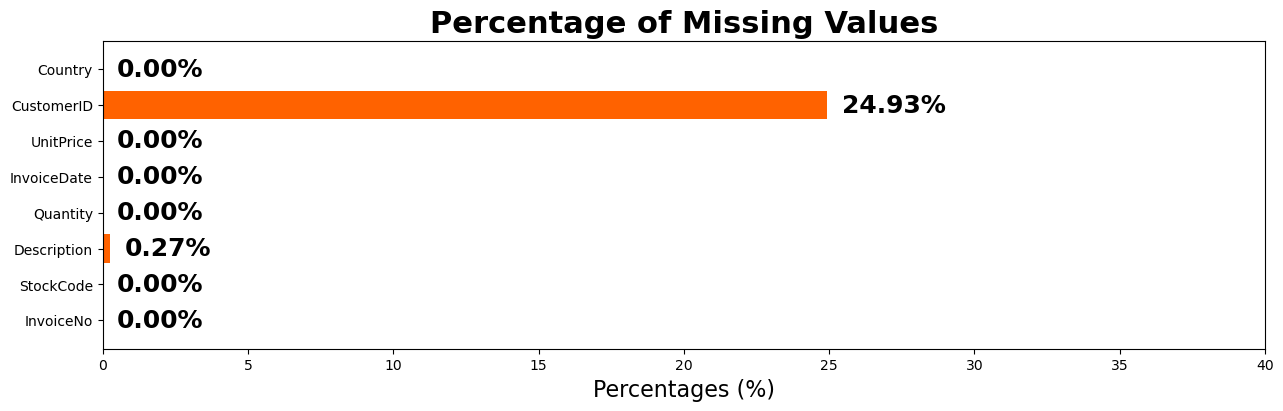

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = missing_values / df.shape[0] * 100

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [7]:
# Extract rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [8]:
# Remove rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

# Verify the removal of missing values
df.isnull().sum().sum()

0

### b. Handling Duplicates

In [9]:
# Check for duplicate values
duplicated_rows = df.duplicated().sum()

# Display the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 5225 duplicate rows that need to be removed.


In [10]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

df.shape[0]

401604

From above analysis, we can conclude that dataset is free of missing values and duplicates.

### c. Handle Cancelled Orders

In [11]:
def handle_cancelled_orders(dataframe):
    """
    Function to remove cancelled orders
    """
    df_ = dataframe.copy()
    
    #Cancelled Orders & Quantity
    
    # Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
    df_['Transaction_Status'] = np.where(df_['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

    # Analyze the characteristics of these rows (considering the new column)
    cancelled_transactions = df_[df_['Transaction_Status'] == 'Cancelled']
    cancelled_transactions.describe().drop('CustomerID', axis=1)
    
    # Finding the percentage of cancelled transactions
    cancelled_percentage = (cancelled_transactions.shape[0] / df_.shape[0]) * 100

    # Printing the percentage of cancelled transactions
    print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")
    
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]
    
    return df_

In [12]:
df = handle_cancelled_orders(df)

df.select_dtypes(include = [float, int]).describe()

The percentage of cancelled transactions in the dataset is: 2.21%


,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### d. Handle Outliers

In [13]:
def handle_outliers(dataframe, variable, q1 = 0.25, q3 = 0.75):
    
    '''
    Function to detect outliers with IQR method and replaces with thresholds 
    
    '''
    
    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit
    
    return df_

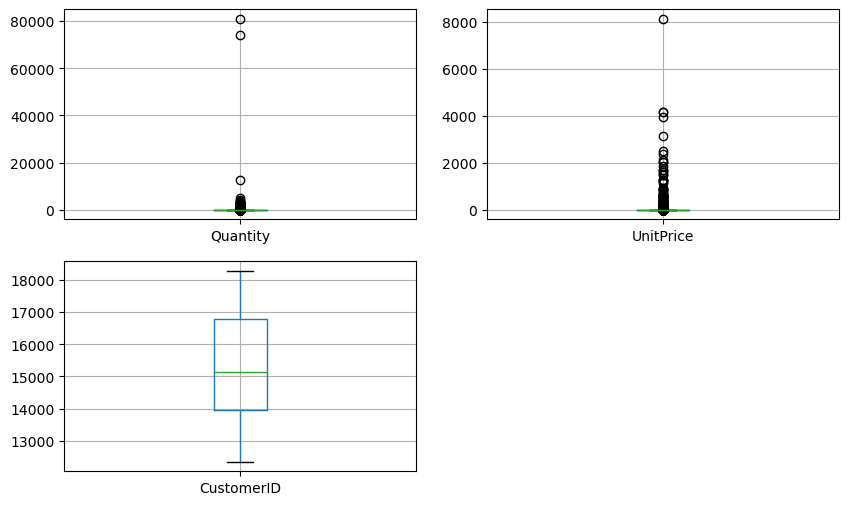

,Quantity,UnitPrice,CustomerID,TotalPrice
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,11.953170,2.899636,15287.734822,20.839399
std,25.665488,3.237587,1713.567773,52.127192
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.390000
75%,12.000000,3.750000,16791.000000,19.800000
max,298.500000,37.060000,18287.000000,3268.575000


In [14]:
# Plot outliers
numerical_df = df.select_dtypes(include = [float, int])
numerical_features = numerical_df.columns

# Detect features with outliers
plt.figure(figsize=[10,3*math.ceil(len(numerical_features)/2)])
for i in range(len(numerical_features)):
    plt.subplot(math.ceil(len(numerical_features)/2),2,i+1)
    df.boxplot(numerical_features[i])

plt.show()

# Handle Outliers
df = handle_outliers(df, "Quantity", q1 = 0.01, q3 = 0.99)
df = handle_outliers(df, "UnitPrice", q1 = 0.01, q3 = 0.99)

#Total Price
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df.select_dtypes(include = [float, int]).describe()

### b. Data Visualization

In [15]:
# Segregate numerical and categorical features
numerical_features = df.select_dtypes(include = [float, int]).columns
categorical_features = df.select_dtypes(include = [object]).columns

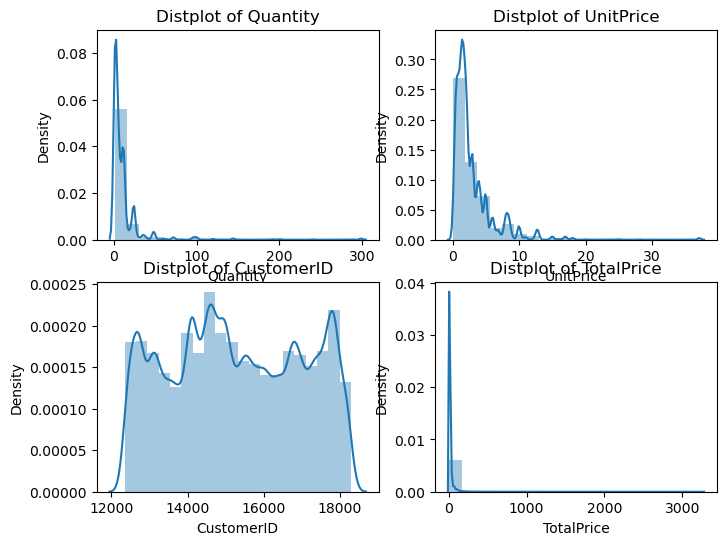

In [16]:
# Data Distribution of Numerical features using Histogram

plt.figure(figsize = (8 , 6))
n = 0 
for f in numerical_features:
    n += 1
    plt.subplot(2 , 2 , n)
    sns.distplot(df[f] , bins = 20)
    plt.title('Distplot of {}'.format(f))
plt.show()

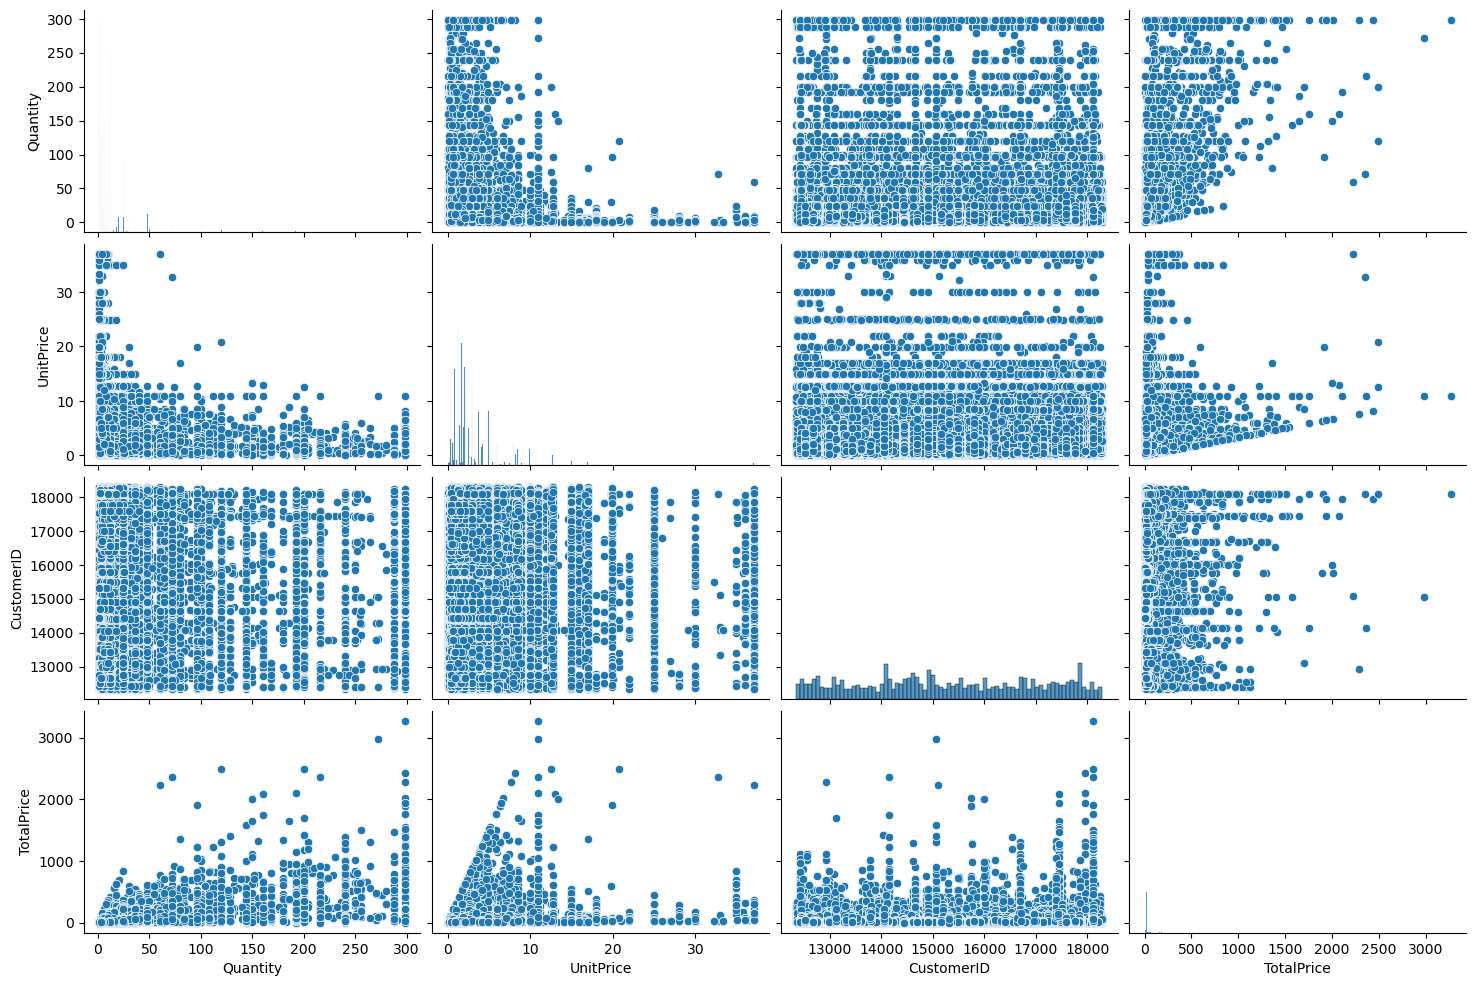

In [17]:
# Data distribution with Pairplot
sns.pairplot(df[numerical_features], aspect=1.5)
plt.show()

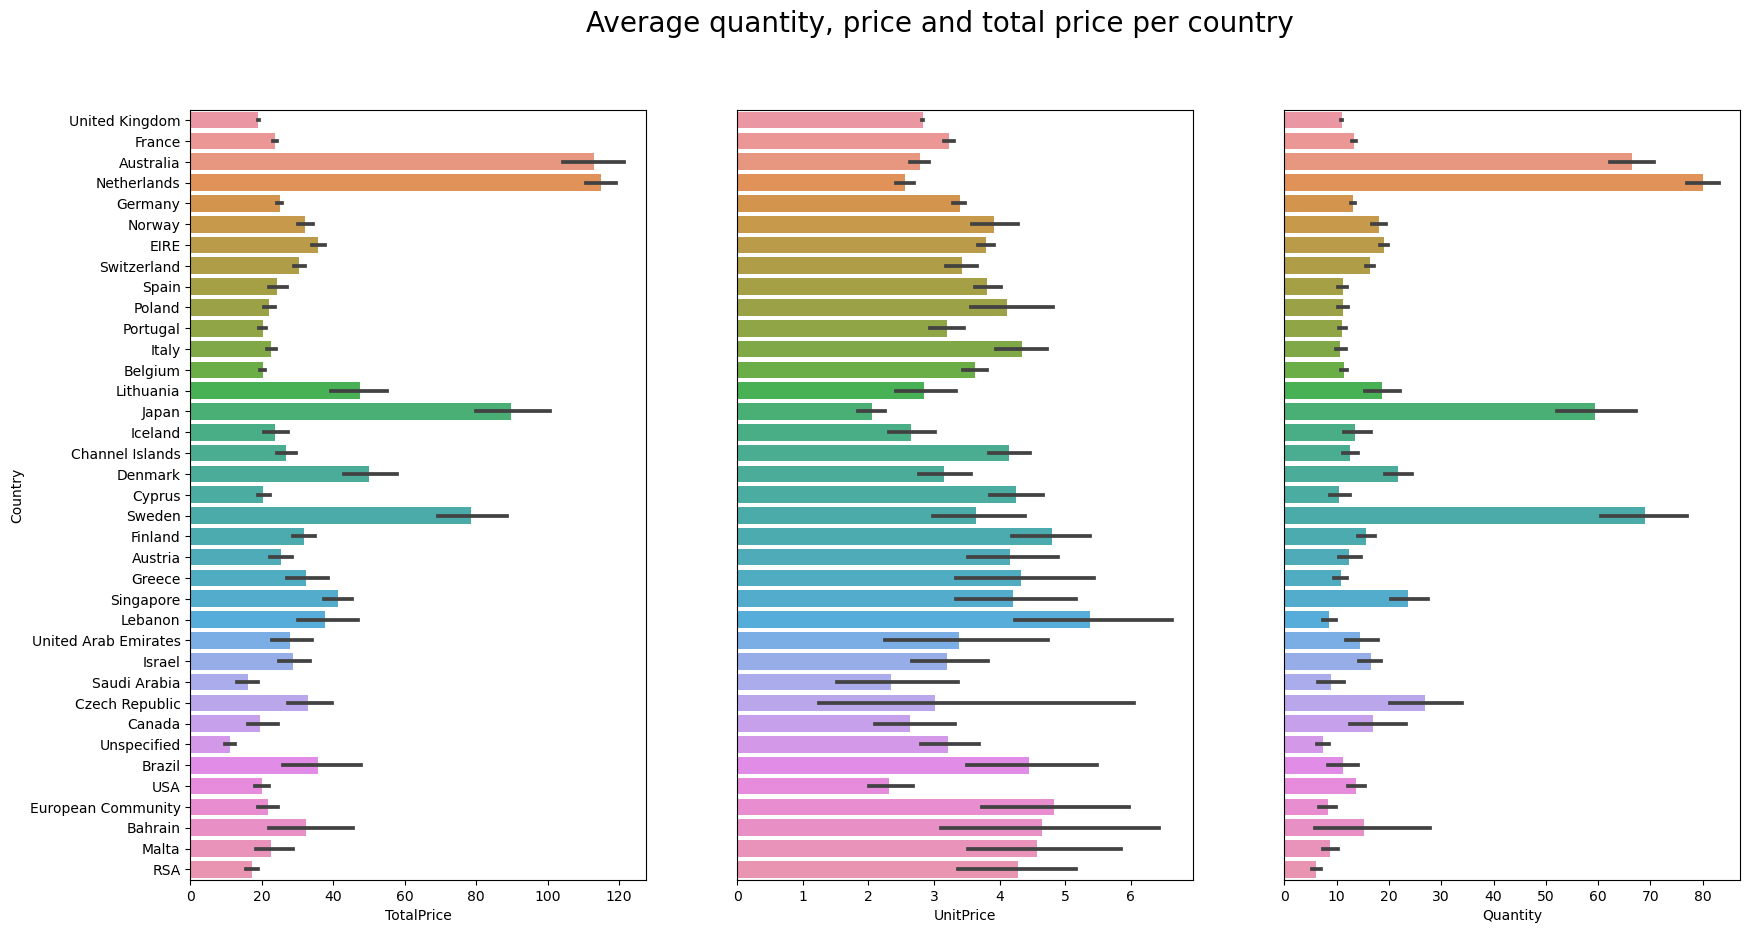

In [18]:
fig = plt.figure(figsize = (20,10))
fig.suptitle("Average quantity, price and total price per country",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.barplot(data=df,x="TotalPrice",y="Country")

axes = fig.add_subplot(1, 3, 2)
sns.barplot(data=df,x="UnitPrice",y="Country")
fig.axes[1].get_yaxis().set_visible(False)

axes = fig.add_subplot(1, 3, 3)
sns.barplot(data=df,x="Quantity",y="Country")
fig.axes[2].get_yaxis().set_visible(False)

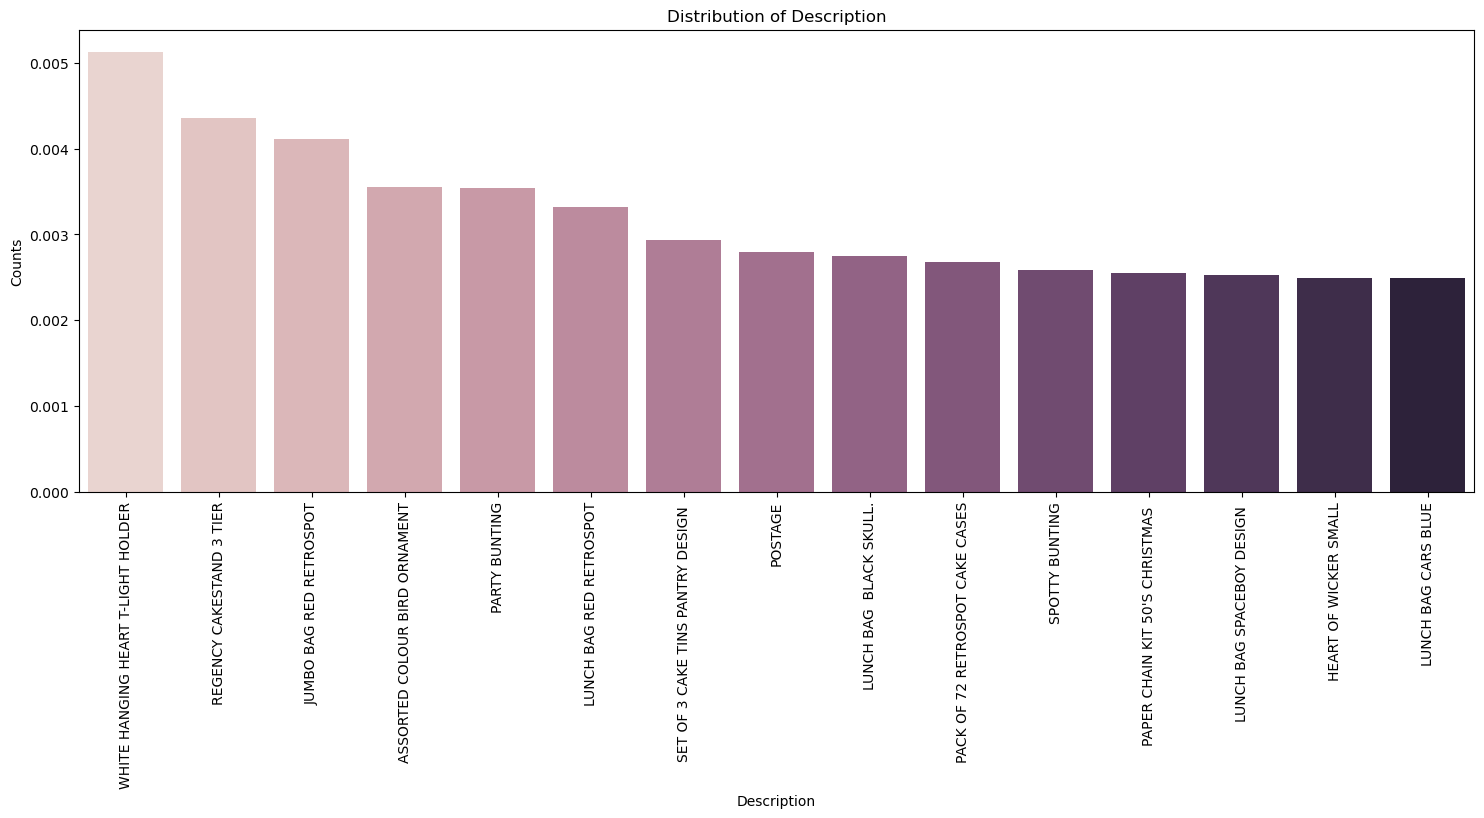

In [19]:
# Data Distribution of Categorical features using Countplot
item_counts = df['Description'].value_counts(normalize=True).sort_values(ascending=False).iloc[:15]
plt.figure(figsize=(18,6))
sns.barplot(data=df, x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel('Counts')
plt.title('Distribution of Description');
plt.xticks(rotation=90);

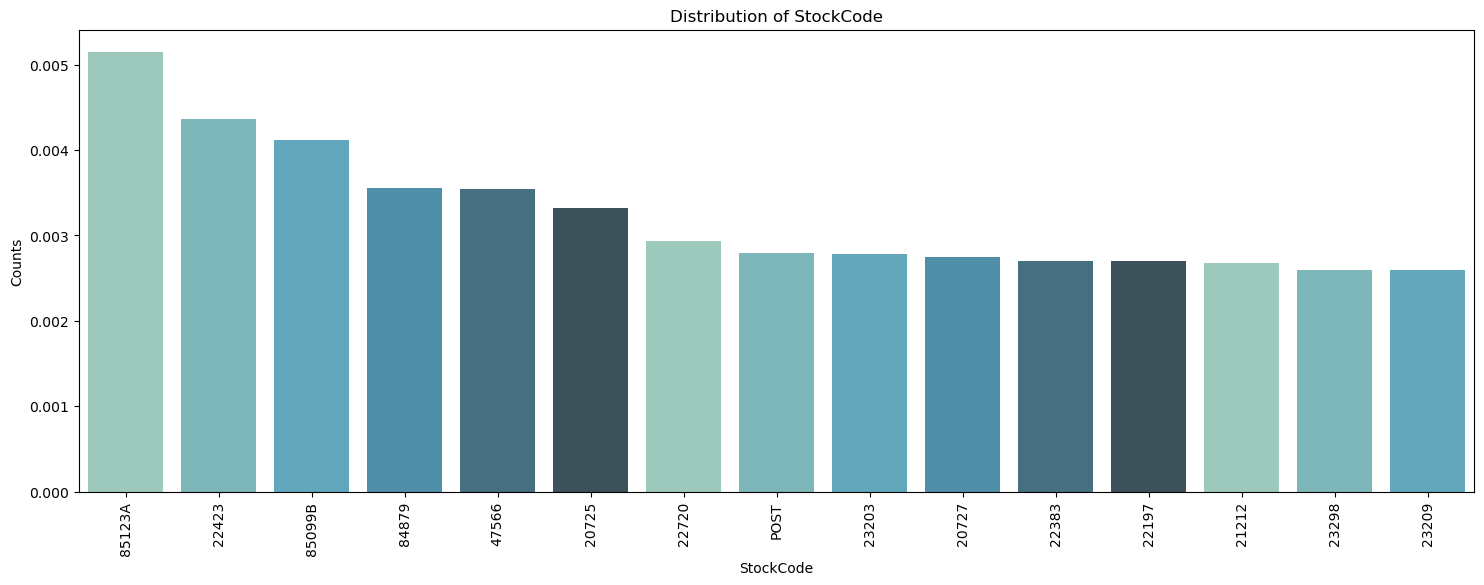

In [20]:
stock_counts = df['StockCode'].value_counts(normalize=True).sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(data=df, x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel('Counts')
plt.title('Distribution of StockCode');
plt.xticks(rotation=90);

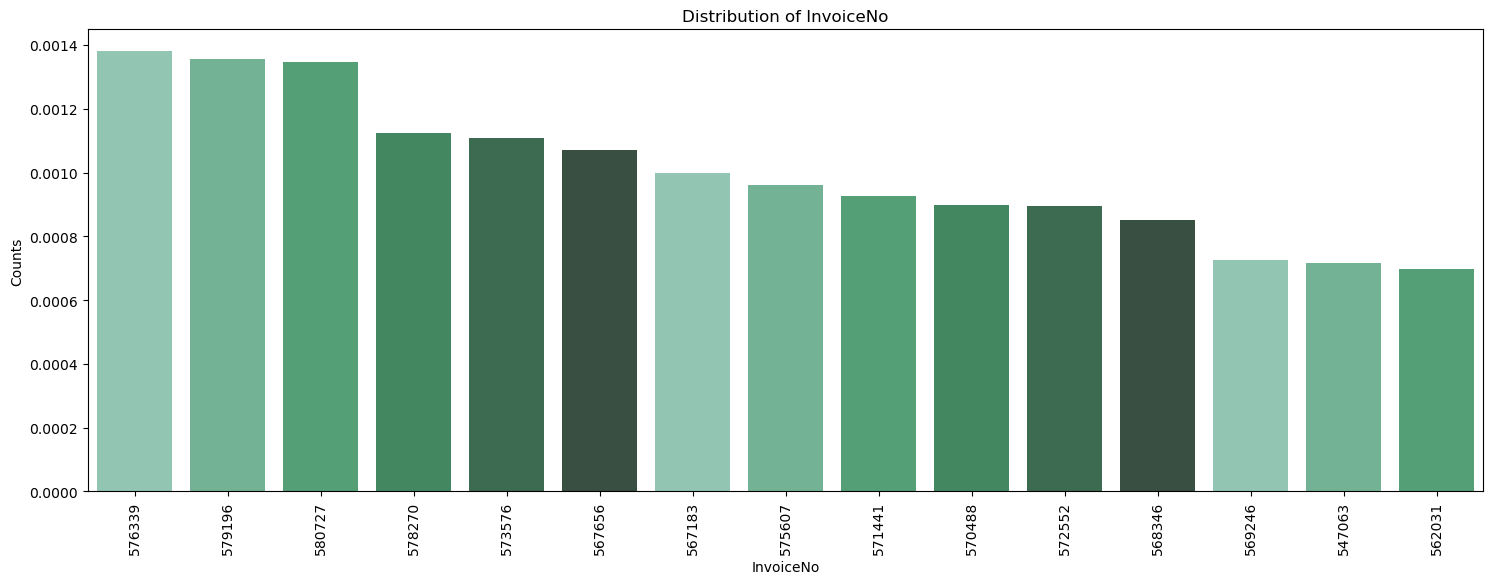

In [21]:
inv_counts = df['InvoiceNo'].value_counts(normalize=True).sort_values(ascending=False).iloc[:15]
plt.figure(figsize=(18,6))
sns.barplot(data=df, x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel('Counts')
plt.title('Distribution of InvoiceNo');
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Country Distribution')

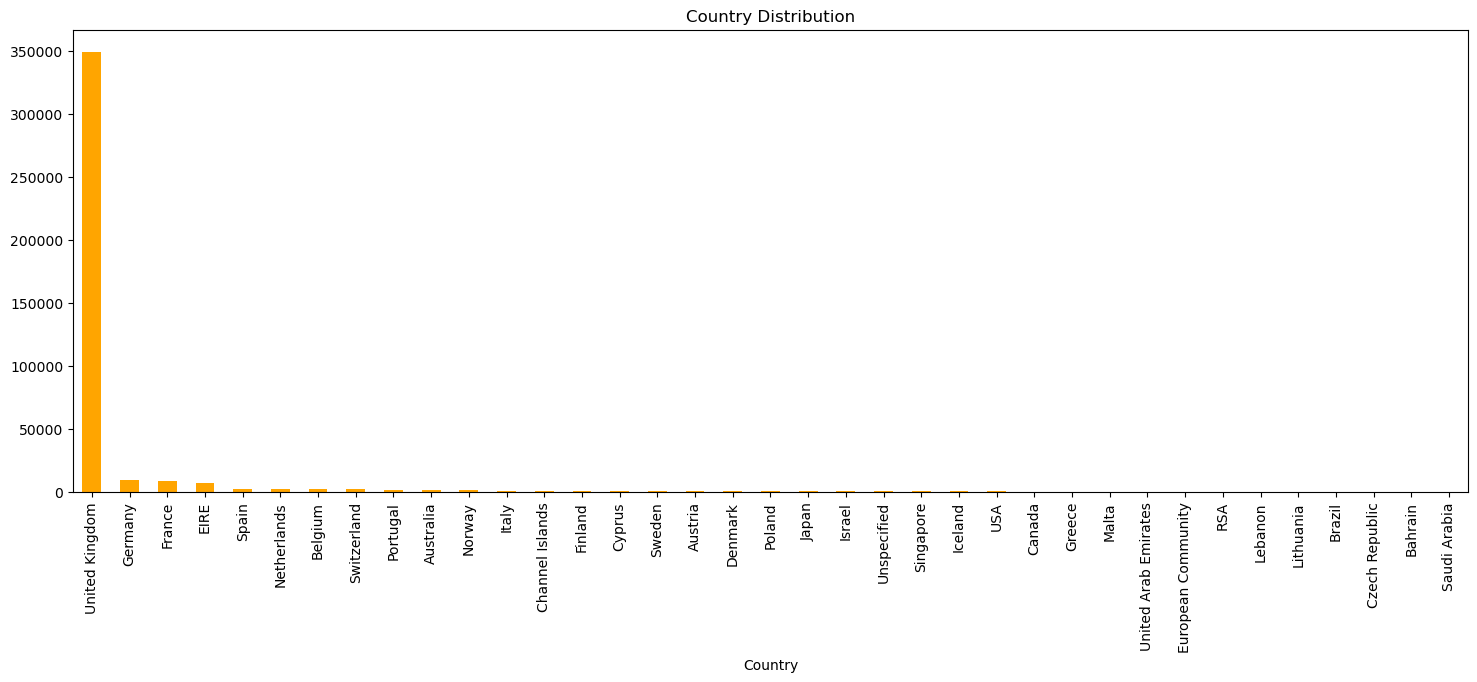

In [22]:
plt.figure(figsize=(18,6))
df['Country'].value_counts().plot(kind='bar', color='orange')
plt.title('Country Distribution')

In [23]:
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country',
       'Transaction_Status'],
      dtype='object')

### c. Correlation Analysis

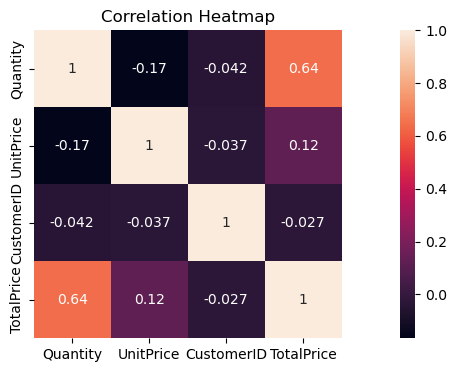

In [24]:
# Define correlation matrix
corr = df[numerical_features].corr()

#Plot the correlation matrix
plt.figure(figsize=(15,4))
sns.heatmap(corr, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show();

## 3. Feature Engineering 

### a. Encoding of Categorical Features

In [25]:
le = LabelEncoder()
df_encoded = df.copy(deep = True)

for f in categorical_features:
    df_encoded[f] = le.fit_transform(df_encoded[f])
    print('\nLabel Encoder Transformation of',f)
    print(df_encoded[f].unique(),' = ',le.inverse_transform(df_encoded[f].unique()))


Label Encoder Transformation of InvoiceNo
[    0     1     2 ... 18533 18534 18535]  =  ['536365' '536366' '536367' ... '581585' '581586' '581587']

Label Encoder Transformation of StockCode
[3233 2643 2847 ... 3658 3458 2399]  =  ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']

Label Encoder Transformation of Description
[3698 3706  858 ... 2446  861 2319]  =  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Label Encoder Transformation of InvoiceDate
[5233 5234 5235 ... 7127 7128 7129]  =  ['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']

Label Encoder Transformation of Country
[35 13  0 23 14 24 10 32 30 25 26 18  3 21 19 16  6  9  7 31 12  1 15 29
 20 34 17 28  8  5 36  4 33 11  2 22 27]  =  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway

In [26]:
# Drop the unnecessary column
df_encoded.drop('Transaction_Status', axis=1, inplace=True)

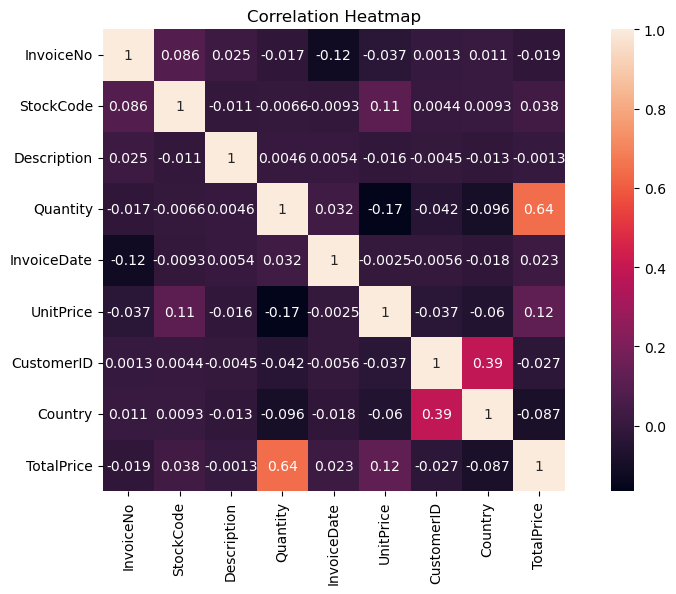

In [27]:
# Define correlation matrix
corr = df_encoded.corr()

#Plot the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(corr, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show();

### b. RFM Analysis

In [29]:
# Convert 'CustomerID' to string
df_encoded['CustomerID'] = df_encoded['CustomerID'].astype(str)

In [30]:
print(df['InvoiceDate'].max())

9/9/2011 9:52


In [31]:
# Calculate Recency, Frequency, and Monetary metrics
import datetime as dt
today_date = dt.datetime(2011,12,11)

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

today_date = dt.datetime(2011,12,11)

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm.reset_index()

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,310.44
1,12347.0,3,7,4310.00
2,12348.0,76,4,1770.78
3,12349.0,19,1,1491.72
4,12350.0,311,1,331.46


In [32]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

In [34]:
#use CustomerID as index
rfm.set_index('CustomerID',inplace=True)

KeyError: "None of ['CustomerID'] are in the columns"

### c. Feature Scaling Using Standardization

In [40]:
# Standardization
sc = StandardScaler() 

df_scaled = rfm.copy(deep = True)

# Normalization
df_scaled[list(rfm.columns)] = sc.fit_transform(df_scaled[list(rfm.columns)])

## 4. Model Building

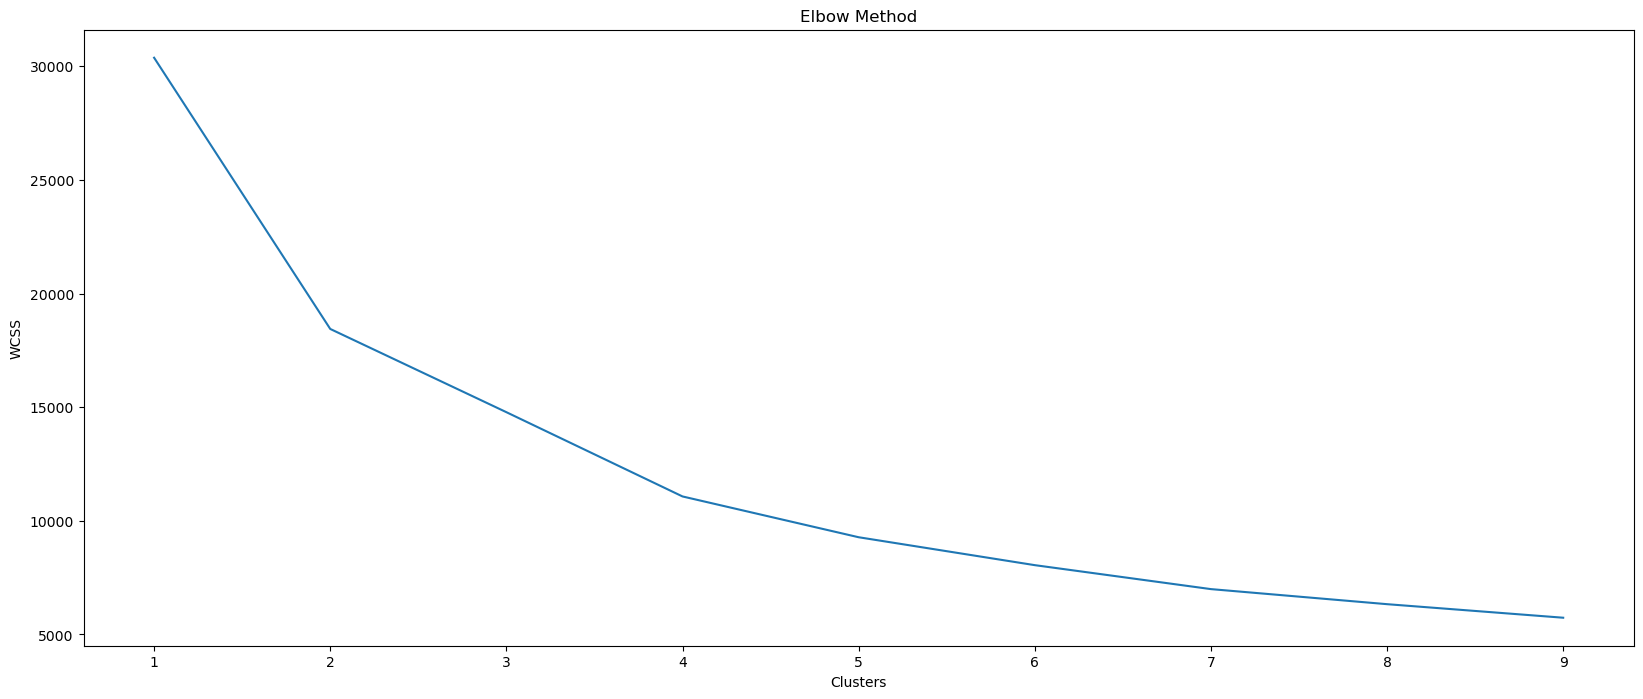

In [41]:
# K-Means Clustering Model Building
wcss = []

# Visualizing the ELBOW method to get the optimal value of K 
for i in range(1, 10):
    km = KMeans(n_clusters=i, init = 'k-means++', random_state = 42).fit(df_scaled)
    wcss.append(km.inertia_)
    
fig = plt.figure(figsize=(20,8))
sns.lineplot(x=range(1, 10), y=wcss)
plt.title('Elbow Method')
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()


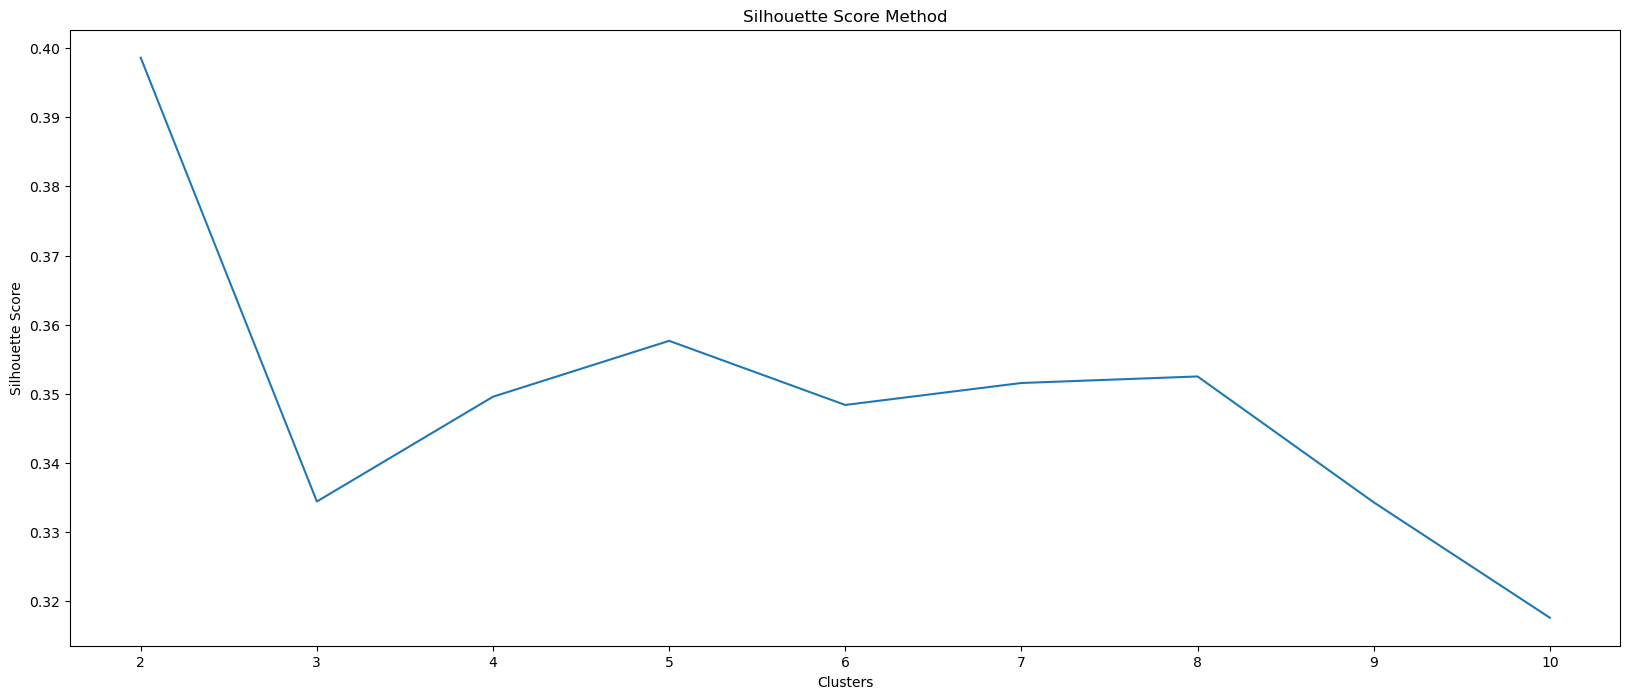

In [42]:
# Silhouette Score Method   
sil_score = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', random_state = 42).fit(df_scaled)
    labels = km.labels_
    sil_score.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))

fig = plt.figure(figsize=(20,8))
sns.lineplot(x = range(2, 11), y = sil_score);
plt.title('Silhouette Score Method')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

The choice here is not so obvious due to the following reasons:

1. Presence of clusters with below average silhouette scores for 5-7 clusters.
2. Wide fluctuations in the size of the silhouette plots.
3. The fluctuation in size is not similar, but better for 6 and 7 clusters.
4. The thickness of the silhouette plot representing each cluster also is a deciding point. Unfortunately we have one cluster which is significantly thicker than the others.

In [43]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_scaled)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure


ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7 below.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


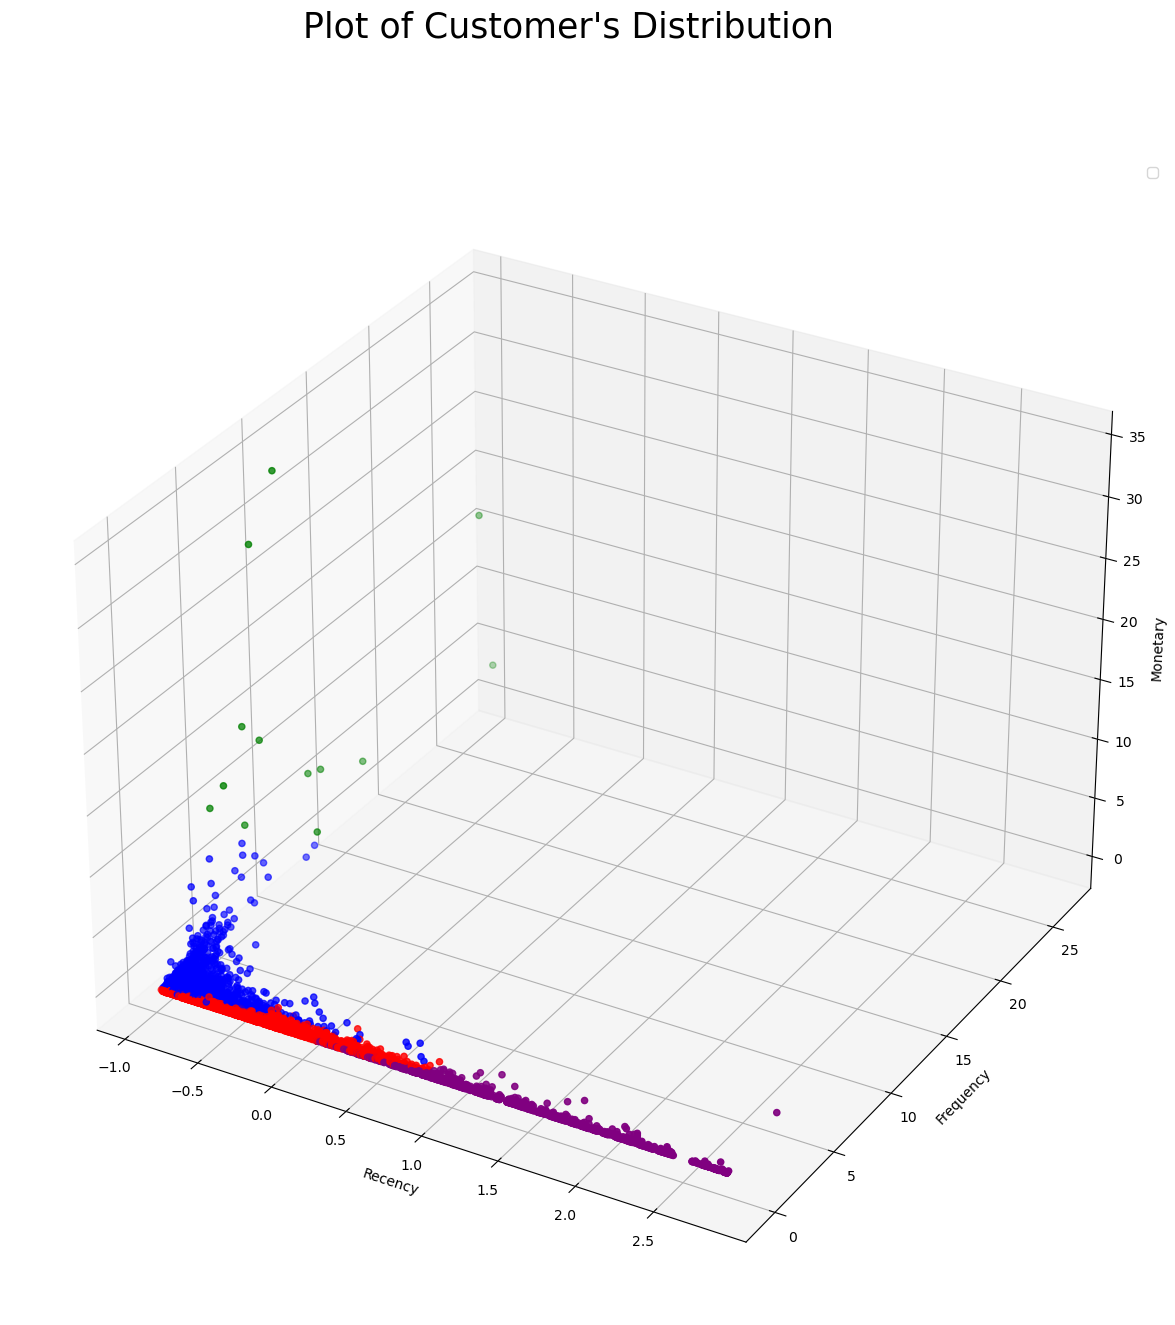

In [51]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=4,  random_state= 42).fit(df_scaled)
df_scaled['Labels'] = km5.labels_
centroids = np.array(km5.cluster_centers_)

# Plot 6 cluster in 3d Scatterplot
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_scaled["recency"], df_scaled["frequency"], df_scaled["monetary"], marker='o', c=colors[df_scaled["Labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
# Copy data sets
df_kmeans = df_scaled.copy()

# Training model
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=df_scaled, ax=ax, hue='Labels')
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=df_scaled, ax=ax, hue='Labels', color='b')
ax.set_title('Labels According to Spending Score')

plt.show()

As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

* Label 0 is low income and low spending score
* Label 1 is low income and high spending score
* Label 2 is mid income and mid spending score
* Label 3 is high income and high spending score
* Label 4 is high income and low spending score